<a href="https://colab.research.google.com/github/M-o-ha-med/PraktikumPembelajaranMesin/blob/main/1227050074_PraktikumPembelajaranMesin_DecisionTree_Mohamed_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [609]:
import pandas as pd
from sklearn.metrics import accuracy_score , f1_score , classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder , MinMaxScaler
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [610]:
# Download latest version
data  = pd.read_csv('hasil_clustering.csv')

In [611]:
data.head()

,provinsi,jenis,daerah,tahun,periode,gk,Cluster
0,ACEH,MAKANAN,PERKOTAAN,2015.0,MARET,293697.0,0
1,ACEH,MAKANAN,PERKOTAAN,2015.0,SEPTEMBER,302128.0,0
2,ACEH,MAKANAN,PERKOTAAN,2016.0,MARET,306243.0,0
3,ACEH,MAKANAN,PERKOTAAN,2016.0,SEPTEMBER,319768.0,0
4,ACEH,MAKANAN,PERDESAAN,2015.0,MARET,297479.0,0


In [612]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261 entries, 0 to 5260
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5261 non-null   object 
 1   jenis     5261 non-null   object 
 2   daerah    5261 non-null   object 
 3   tahun     5261 non-null   float64
 4   periode   5261 non-null   object 
 5   gk        5261 non-null   float64
 6   Cluster   5261 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 287.8+ KB


In [613]:
data.isna().sum()

,0
provinsi,0
jenis,0
daerah,0
tahun,0
periode,0
gk,0
Cluster,0


In [614]:
data.duplicated().sum()

np.int64(0)

In [615]:
data.describe()

,tahun,gk,Cluster
count,5261.000000,5261.000000,5261.000000
mean,2018.244250,303904.185516,0.980802
std,2.491855,158176.024903,0.809058
min,2013.000000,48561.000000,0.000000
25%,2016.000000,144674.000000,0.000000
50%,2018.000000,313294.000000,1.000000
75%,2020.000000,410188.000000,2.000000
max,2022.000000,872843.000000,2.000000


In [616]:
independent_variables = data.drop(['Cluster'],axis=1)
dependent_variable = data['Cluster']

In [617]:
independent_variables

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015.0,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015.0,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016.0,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016.0,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015.0,MARET,297479.0
...,...,...,...,...,...,...
5256,INDONESIA,TOTAL,PERDESAAN,2022.0,SEPTEMBER,513170.0
5257,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021.0,MARET,472525.0
5258,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2021.0,SEPTEMBER,486168.0
5259,INDONESIA,TOTAL,PERDESAANPERKOTAAN,2022.0,MARET,505468.0


In [618]:
# Periksa distribusi target 'Cluster'
print(dependent_variable.value_counts())


Cluster
1    1816
0    1773
2    1672
Name: count, dtype: int64


In [619]:
X_train , X_test , y_train , y_test = train_test_split(independent_variables , dependent_variable , test_size=0.2 , random_state=42)

In [620]:
y_test

,Cluster
2269,0
3971,2
4129,2
4358,2
3980,2
...,...
5053,2
4503,1
3428,1
1391,1


In [621]:
print(y_train.value_counts())
print(y_test.value_counts())


Cluster
1    1466
0    1406
2    1336
Name: count, dtype: int64
Cluster
0    367
1    350
2    336
Name: count, dtype: int64


In [622]:
normalize = MinMaxScaler()
label_encoder = {}
categorical_column = X_train.select_dtypes(include=['object']).columns
numerical_column = X_train.select_dtypes(include=['float64' , 'int64']).columns

for col in categorical_column:
    label_encoder[col] = LabelEncoder()
    X_train[col] = label_encoder[col].fit_transform(X_train[col])
    X_test[col] = label_encoder[col].transform(X_test[col])


In [623]:
model = DecisionTreeClassifier(max_depth=5, min_samples_split=8, min_samples_leaf=6, random_state=42)
model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, min_samples_split=8,
                       random_state=42)

In [624]:
y_pred = model.predict(X_test)

In [625]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       350
           2       1.00      1.00      1.00       336

    accuracy                           1.00      1053
   macro avg       1.00      1.00      1.00      1053
weighted avg       1.00      1.00      1.00      1053



In [626]:
print(f'Accuracy Score : {accuracy_score(y_pred , y_test)}')
print(f'f-1 Score : {f1_score(y_pred , y_test , average="weighted")}')


Accuracy Score : 1.0
f-1 Score : 1.0


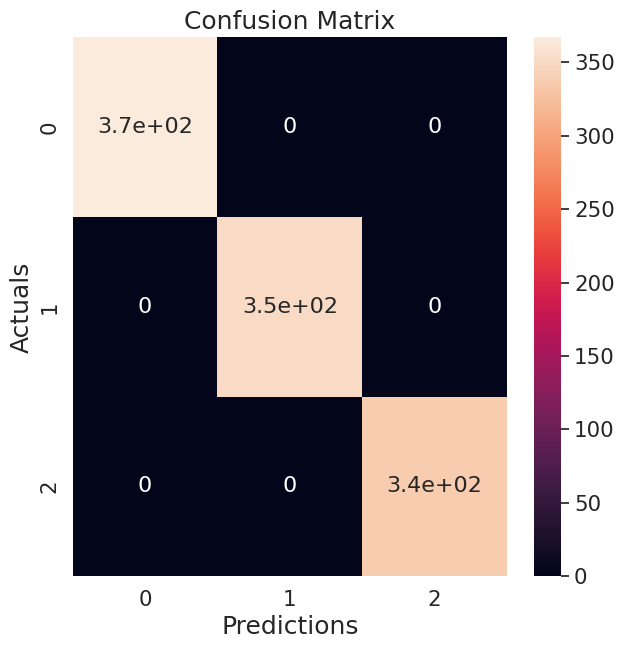

In [627]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,7))

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, ax=ax,annot=True, annot_kws={"size": 16}) # font size

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


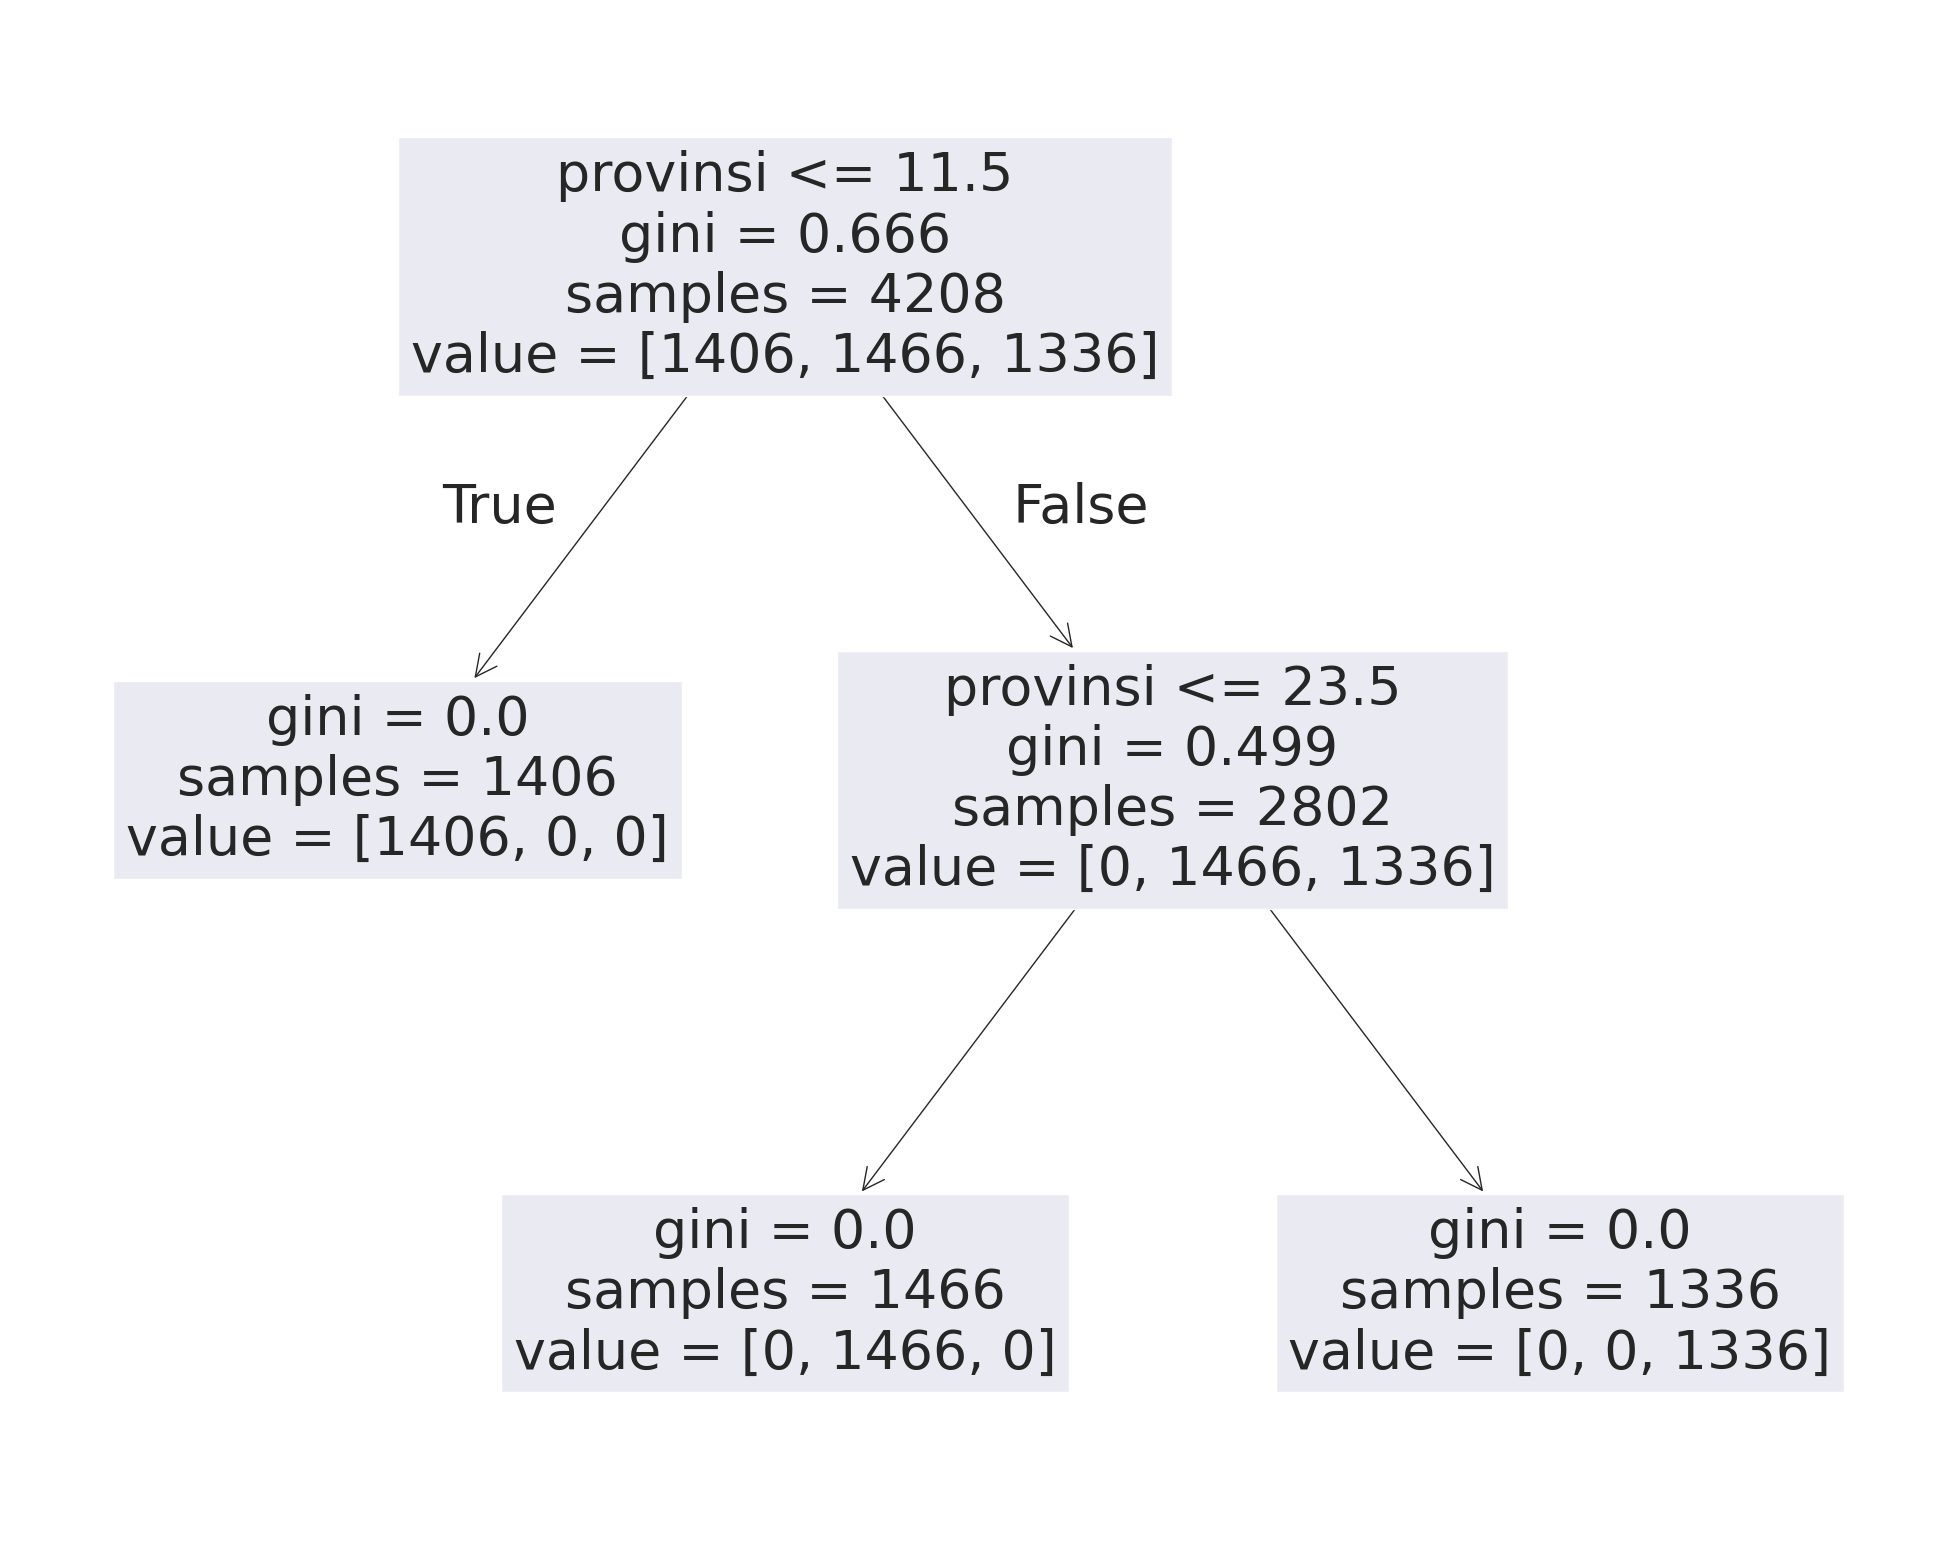

In [630]:
# Visualize tree
from sklearn import tree
fig, ax = plt.subplots(figsize=(25,20))
tree.plot_tree(model, feature_names=independent_variables.columns)
plt.show()
